In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/content/drive/MyDrive/HackerEarth/data-prediction-importance/train.csv')
test = pd.read_csv('/content/drive/MyDrive/HackerEarth/data-prediction-importance/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/HackerEarth/data-prediction-importance/sample_submission.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,...,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-92699,28/05/2009,28/05/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-184490,10/07/2018,10/07/2018,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-113810,18/10/2012,18/10/2012,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-141929,25/03/2014,25/03/2014,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-94585,01/10/2009,01/10/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [4]:
print(train.shape,
      test.shape)

(8878, 328) (4760, 327)


In [5]:
def missing_values(df):
    mis_val = df.isnull().sum() #tổng các giá trị còn thiếu
    mis_val_per = 100 * df.isnull().sum()/len(df) #Phần trăm các giá trị còn thiếu
    mis_val_table = pd.concat([mis_val, mis_val_per], axis=1) #Tạo thành bảng để thể hiện 2 giá trị trên
    mis_val_table_rename = mis_val_table.rename(
    columns = {0: "Missing", 1 : "Percent %"})
    #Sắp xếp bảng theo tỉ lệ phần trăm giảm dần
    mis_val_table_rename = mis_val_table_rename[mis_val_table_rename.iloc[:, 1] != 0].sort_values("Percent %", ascending=False).round(1)
    print("Có tất cả " + str(df.shape[1]) + " cột.\n"
          "Trog đó có " + str(mis_val_table_rename.shape[0]) + " cột bị thiếu data")
    return mis_val_table_rename

In [6]:
missing_values(train)

Có tất cả 328 cột.
Trog đó có 35 cột bị thiếu data


,Missing,Percent %
respondent.4,8877,100.0
respondent.3,8877,100.0
respondent.2,8877,100.0
parties.2,8877,100.0
issue.26,8877,100.0
issue.25,8877,100.0
issue.24,8877,100.0
issue.18,8876,100.0
issue.23,8876,100.0
issue.21,8876,100.0


In [7]:
missing_values(test)

Có tất cả 327 cột.
Trog đó có 35 cột bị thiếu data


,Missing,Percent %
parties.2,4760,100.0
issue.26,4760,100.0
issue.25,4760,100.0
issue.24,4760,100.0
issue.22,4759,100.0
issue.21,4759,100.0
respondent.3,4759,100.0
issue.23,4759,100.0
respondent.4,4759,100.0
issue.17,4758,100.0


In [8]:
c_train = train.copy()
c_test = test.copy()

c_train['train'] = 1
c_test['train'] = 0
df = pd.concat([c_train, c_test], axis=0, sort=False)

In [9]:
missing_values(df)

Có tất cả 329 cột.
Trog đó có 36 cột bị thiếu data


,Missing,Percent %
issue.26,13637,100.0
issue.25,13637,100.0
issue.24,13637,100.0
parties.2,13637,100.0
respondent.4,13636,100.0
respondent.3,13636,100.0
issue.23,13635,100.0
respondent.2,13635,100.0
issue.22,13635,100.0
issue.21,13635,100.0


In [10]:
issue_drop = ['issue.{}'.format(i) for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                                           19,20,21,22,23,24,25,26]]
#respondent_drop = ['respondent.{}'.format(i) for i in [1, 2, 3, 4]]

df = df.drop(issue_drop, axis=1)

In [11]:
#df = df.drop(respondent_drop, axis=1)

In [12]:
df = df.drop(columns=['parties.2', 'decisiondate', 'introductiondate'], axis=1)

In [13]:
missing_values(df)

Có tất cả 300 cột.
Trog đó có 7 cột bị thiếu data


,Missing,Percent %
respondent.3,13636,100.0
respondent.4,13636,100.0
respondent.2,13635,100.0
respondent.1,13581,99.6
issue.0,10162,74.5
importance,4760,34.9
parties.1,6,0.0


    Feature Engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13638 entries, 0 to 4759
Columns: 300 entries, appno to train
dtypes: bool(1), float64(2), int64(276), object(21)
memory usage: 31.2+ MB


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

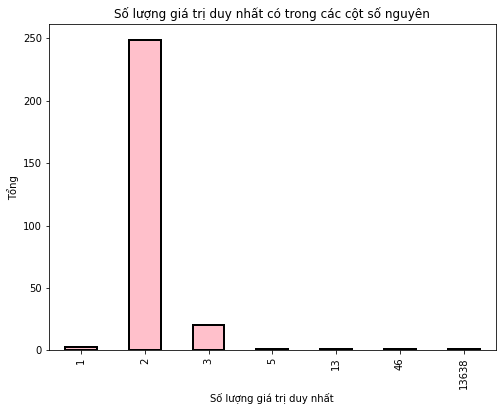

In [16]:
df.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color="pink", figsize=(8,6),
                                                                             edgecolor='k', linewidth=2);
plt.xlabel("Số lượng giá trị duy nhất");
plt.ylabel("Tổng")
plt.title("Số lượng giá trị duy nhất có trong các cột số nguyên");

    số lượng cột có 2 giá trị nhiều nhất -> kiểu boolean

In [17]:
df['importance'].value_counts()

4.0    5774
3.0    2011
1.0     582
2.0     511
Name: importance, dtype: int64

    Feature: issue.0

In [18]:
df['issue.0'].value_counts()

Article 127 of the Constitution                                                                                  13
Act Governing the Formation and Proceedings of Martial Law Courts (Law no. 353 of 26 October 1963), Article 4    13
Code of Criminal Procedure                                                                                       13
Federal Law on Enforcement Proceedings 1997, sections 9 and 13                                                   12
Code of Obligations, Article 105                                                                                 12
                                                                                                                 ..
Article 53 of the Convention                                                                                      1
Article 178 of the RSFSR Code of Criminal Procedure (Law of 27 October 1960)                                      1
Code of Criminal Procedure, (former) Article 185 § 1                    

In [19]:
df['issue.0'] = df['issue.0'].fillna(0)

    parties.1

In [20]:
df['parties.1']

0            RUSSIA
1            TURKEY
2          SLOVENIA
3       SWITZERLAND
4            RUSSIA
           ...     
4755         RUSSIA
4756       SLOVENIA
4757        ROMANIA
4758         GREECE
4759        AUSTRIA
Name: parties.1, Length: 13638, dtype: object

In [21]:
df['parties.1'].value_counts()

RUSSIA                            2623
UKRAINE                           1365
TURKEY                            1305
POLAND                             971
HUNGARY                            558
                                  ... 
ARMENIA AND MOLDOVA                  1
SAN MARINO AND ITALY                 1
AZERBAIJAN AND TURKEY                1
HUNGARY AND ITALY                    1
SWITZERLAND (No. 2) [Extracts]       1
Name: parties.1, Length: 107, dtype: int64

In [22]:
df['parties.1'].isnull().sum()

6

In [23]:
df['parties.1'] = df['parties.1'].fillna('RUSSIA')

In [24]:
missing_values(df)

Có tất cả 300 cột.
Trog đó có 5 cột bị thiếu data


,Missing,Percent %
respondent.3,13636,100.0
respondent.4,13636,100.0
respondent.2,13635,100.0
respondent.1,13581,99.6
importance,4760,34.9


    Feature Tools

In [25]:
#tạo ma trận tương quan
corr_matrix = df.corr()

#chọn tam giác trên của ma trận tương quan
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#tìm chỉ mục của các feature có độ tương quan >0.95
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

print(f"Có {len(to_drop)} cột cần loại bỏ")
print(to_drop)

Có 49 cột cần loại bỏ
['applicability=15', 'applicability=29', 'applicability=31', 'paragraphs=3', 'paragraphs=6', 'paragraphs=5', 'paragraphs=P1-1', 'paragraphs=8', 'paragraphs=13', 'paragraphs=10', 'paragraphs=2', 'paragraphs=34', 'paragraphs=41', 'paragraphs=38', 'paragraphs=35', 'paragraphs=29-3', 'paragraphs=4', 'paragraphs=29', 'paragraphs=14', 'paragraphs=P12-1', 'paragraphs=9', 'paragraphs=1', 'paragraphs=11', 'paragraphs=46', 'paragraphs=17', 'paragraphs=18', 'paragraphs=7', 'paragraphs=', 'paragraphs=37', 'paragraphs=57', 'paragraphs=26', 'paragraphs=27', 'paragraphs=36', 'paragraphs=30', 'paragraphs=12', 'paragraphs=P7-1-1', 'paragraphs=56', 'paragraphs=39', 'paragraphs=15', 'paragraphs=25', 'paragraphs=19', 'paragraphs=32', 'paragraphs=33', 'paragraphs=53', 'paragraphs=28', 'paragraphs=43', 'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=16']


In [26]:
df = df.drop(columns=to_drop)
df.shape

(13638, 251)

Text(0.5, 1.0, 'Sự phân bố của các biến')

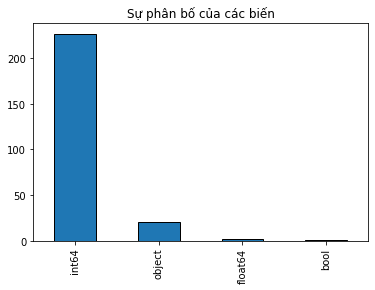

In [27]:
df.dtypes.value_counts().plot.bar(edgecolor='k');
plt.title("Sự phân bố của các biến")

In [28]:
df.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,issue.0,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,...,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance,train
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,0,001-92699,28/05/2009,28/05/2009,ENG,4,First Section,Court,KOKOSHKINA,RUSSIA,685.417419,RUS,NaN,NaN,NaN,NaN,38,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,1
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,0,001-184490,10/07/2018,10/07/2018,ENG,26,Second Section Committee,Court,ÖZCAN,TURKEY,2641.901855,TUR,NaN,NaN,NaN,NaN,47,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,1
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,0,001-113810,18/10/2012,18/10/2012,ENG,23,Fith Section,Court,DANIJEL PEČNIK,SLOVENIA,942.213440,SVN,NaN,NaN,NaN,NaN,43,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0,1
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,0,001-141929,25/03/2014,25/03/2014,ENG,5,Second Section,Court,PALANCI,SWITZERLAND,1121.770142,CHE,NaN,NaN,NaN,NaN,46,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4.0,1
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,0,001-94585,01/10/2009,01/10/2009,ENG,4,First Section,Court,AMANAT ILYASOVA AND OTHERS,RUSSIA,704.821594,RUS,NaN,NaN,NaN,NaN,38,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,1


In [29]:
train = df[df['train']==1]
train = train.drop(['train'], axis=1)

In [30]:
train.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,issue.0,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,...,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,0,001-92699,28/05/2009,28/05/2009,ENG,4,First Section,Court,KOKOSHKINA,RUSSIA,685.417419,RUS,NaN,NaN,NaN,NaN,38,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,0,001-184490,10/07/2018,10/07/2018,ENG,26,Second Section Committee,Court,ÖZCAN,TURKEY,2641.901855,TUR,NaN,NaN,NaN,NaN,47,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,0,001-113810,18/10/2012,18/10/2012,ENG,23,Fith Section,Court,DANIJEL PEČNIK,SLOVENIA,942.213440,SVN,NaN,NaN,NaN,NaN,43,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,0,001-141929,25/03/2014,25/03/2014,ENG,5,Second Section,Court,PALANCI,SWITZERLAND,1121.770142,CHE,NaN,NaN,NaN,NaN,46,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4.0
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,0,001-94585,01/10/2009,01/10/2009,ENG,4,First Section,Court,AMANAT ILYASOVA AND OTHERS,RUSSIA,704.821594,RUS,NaN,NaN,NaN,NaN,38,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0


In [31]:
test = df[df['train']==0]
test = test.drop(['train', 'importance'], axis=1)
test.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,issue.0,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,...,paragraphs=P7-3,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,0,001-103613,24/02/2011,24/02/2011,ENG,29,Fith Section Committee,Court,CAMINSKI,"""THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA""",794.766724,MKD,NaN,NaN,NaN,NaN,33,False,359124,15,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,0,001-158963,03/12/2015,03/12/2015,ENG,23,Fith Section,Court,KUSHCH,UKRAINE,1448.891235,UKR,NaN,NaN,NaN,NaN,48,False,435683,15,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,0,001-108659,19/01/2012,19/01/2012,ENG,29,Fith Section Committee,Court,O.,IRELAND,868.238831,IRL,NaN,NaN,NaN,NaN,22,False,357179,15,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,"Articles 32-33,134 and 135 of the Constitution",001-122260,04/07/2013,04/07/2013,ENG,4,First Section,Court,ANCHUGOV AND GLADKOV,RUSSIA,1024.145508,RUS,NaN,NaN,NaN,NaN,38,False,430113,15,0,0,1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,"Articles 1, 11, 89, 96 and 122 of the Code of ...",001-91447,26/02/2009,26/02/2009,ENG,4,First Section,Court,EMINBEYLI,RUSSIA,672.862183,RUS,NaN,NaN,NaN,NaN,38,False,352583,15,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
test['importance'] = np.nan
data = train.append(test, ignore_index=True)

In [33]:
data.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,issue.0,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,...,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,0,001-92699,28/05/2009,28/05/2009,ENG,4,First Section,Court,KOKOSHKINA,RUSSIA,685.417419,RUS,NaN,NaN,NaN,NaN,38,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,0,001-184490,10/07/2018,10/07/2018,ENG,26,Second Section Committee,Court,ÖZCAN,TURKEY,2641.901855,TUR,NaN,NaN,NaN,NaN,47,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,0,001-113810,18/10/2012,18/10/2012,ENG,23,Fith Section,Court,DANIJEL PEČNIK,SLOVENIA,942.213440,SVN,NaN,NaN,NaN,NaN,43,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,0,001-141929,25/03/2014,25/03/2014,ENG,5,Second Section,Court,PALANCI,SWITZERLAND,1121.770142,CHE,NaN,NaN,NaN,NaN,46,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4.0
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,0,001-94585,01/10/2009,01/10/2009,ENG,4,First Section,Court,AMANAT ILYASOVA AND OTHERS,RUSSIA,704.821594,RUS,NaN,NaN,NaN,NaN,38,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0


In [34]:
missing_values(data)

Có tất cả 250 cột.
Trog đó có 5 cột bị thiếu data


,Missing,Percent %
respondent.3,13636,100.0
respondent.4,13636,100.0
respondent.2,13635,100.0
respondent.1,13581,99.6
importance,4760,34.9


In [35]:
data.shape

(13638, 250)

In [36]:
a = []
for col in data.columns:
    if len(data) == data[col].nunique():
        a.append(col)
a

['ecli', 'itemid', 'sharepointid']

    lower case object columns

In [37]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.lower()

    chuyển đổi tất cả các quốc gia thành một gí trị số tương ứng

In [38]:
def universalize_countries(df):
# converting all the countries to single symbolic numerical value.(eg - Albania, albania, abl, ab -> 1)
    country_dict_A = df[['respondentOrderEng','country.name']].set_index('country.name').T.to_dict('list')
    country_dict_C = df[['respondentOrderEng','respondent.0']].set_index('respondent.0').T.to_dict('list')    
    country_dict = {}
    for d in (country_dict_A, country_dict_C):#, country_dict_C): #, country_dict_D, country_dict_E, country_dict_F): 
        country_dict.update(d)
        
    country_dict = {k: v for k, v in country_dict.items() if pd.notna(k)}
    df['respondent.0'] = df['respondent.0'].apply(lambda x: country_dict[x][0])
    df['respondent.1'] = df['respondent.1'].apply(lambda x: country_dict[x][0] if pd.notnull(x) else x)
    df['respondent.2'] = df['respondent.2'].apply(lambda x: country_dict[x][0] if pd.notnull(x) else x)
    df['respondent.3'] = df['respondent.3'].apply(lambda x: country_dict[x][0] if pd.notnull(x) else x)
    df['respondent.4'] = df['respondent.4'].apply(lambda x: country_dict[x][0] if pd.notnull(x) else x)
    del df['respondentOrderEng']
    return df

In [39]:
data = universalize_countries(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  after removing the cwd from sys.path.


In [40]:
data.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,issue.0,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,...,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,ms word,ru,russian federation,case of kokoshkina v. russia,chamber,ecli:ce:echr:2009:0528jud000205208,NaN,001-92699,28/05/2009,28/05/2009,eng,4,first section,court,kokoshkina,russia,685.417419,38,NaN,NaN,NaN,NaN,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
1,4728/07,ms word,tr,turkey,case of özcan v. turkey,committee,ecli:ce:echr:2018:0710jud000472807,NaN,001-184490,10/07/2018,10/07/2018,eng,26,second section committee,court,özcan,turkey,2641.901855,47,NaN,NaN,NaN,NaN,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
2,44135/06,ms word,si,slovenia,case of danijel pečnik v. slovenia,chamber,ecli:ce:echr:2012:1018jud004413506,NaN,001-113810,18/10/2012,18/10/2012,eng,23,fith section,court,danijel pečnik,slovenia,942.213440,43,NaN,NaN,NaN,NaN,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0
3,2607/08,ms word,ch,switzerland,case of palanci v. switzerland,chamber,ecli:ce:echr:2014:0325jud000260708,NaN,001-141929,25/03/2014,25/03/2014,eng,5,second section,court,palanci,switzerland,1121.770142,46,NaN,NaN,NaN,NaN,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4.0
4,27001/06,ms word,ru,russian federation,case of amanat ilyasova and others v. russia,chamber,ecli:ce:echr:2009:1001jud002700106,NaN,001-94585,01/10/2009,01/10/2009,eng,4,first section,court,amanat ilyasova and others,russia,704.821594,38,NaN,NaN,NaN,NaN,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0


In [41]:
data.shape

(13638, 249)

    Loại bỏ những cột chỉ có duy nhất 1 giá trị

In [42]:
for col in data.columns:
    if data[col].nunique() == 1:
        print(col, end=', ')
        print(len(col))
        del data[col]

print(data.shape)

application, 11
languageisocode, 15
originatingbody_type, 20
respondent.3, 12
respondent.4, 12
documentcollectionid=CASELAW, 28
documentcollectionid=JUDGMENTS, 30
documentcollectionid=ENG, 24
(13638, 241)


In [43]:
def remove_features_unwanted(df):
    remove_cols =['parties.0', 'country.alpha2', 'parties.1', 'country.name', 
                  'docname', 'appno', 'ecli', 'kpdate', 'originatingbody_name']
    for col in remove_cols:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)   
    return df

data = remove_features_unwanted(data)
print(data.shape)
data.head()

(13638, 232)


,doctypebranch,issue.0,itemid,judgementdate,originatingbody,rank,respondent.0,respondent.1,respondent.2,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,...,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,chamber,NaN,001-92699,28/05/2009,4,685.417419,38,NaN,NaN,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
1,committee,NaN,001-184490,10/07/2018,26,2641.901855,47,NaN,NaN,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
2,chamber,NaN,001-113810,18/10/2012,23,942.213440,43,NaN,NaN,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0
3,chamber,NaN,001-141929,25/03/2014,5,1121.770142,46,NaN,NaN,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4.0
4,chamber,NaN,001-94585,01/10/2009,4,704.821594,38,NaN,NaN,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0


    Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
col_obj = data.select_dtypes(include='object')
col_obj

,doctypebranch,issue.0,itemid,judgementdate
0,chamber,NaN,001-92699,28/05/2009
1,committee,NaN,001-184490,10/07/2018
2,chamber,NaN,001-113810,18/10/2012
3,chamber,NaN,001-141929,25/03/2014
4,chamber,NaN,001-94585,01/10/2009
...,...,...,...,...
13633,committee,NaN,001-166733,20/09/2016
13634,committee,NaN,001-145231,03/07/2014
13635,chamber,NaN,001-110382,17/04/2012
13636,committee,NaN,001-184485,12/07/2018


In [46]:
a = []
for col in data.columns:
    if data[col].dtype == 'object':
        a.append(col)
a

['doctypebranch', 'issue.0', 'itemid', 'judgementdate']

In [47]:
le = LabelEncoder()
for col in a:
    if col in data.columns:
        i = data.columns.get_loc(col)
        data.iloc[:,i] = data.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [48]:
missing_values(data)

Có tất cả 232 cột.
Trog đó có 3 cột bị thiếu data


,Missing,Percent %
respondent.2,13635,100.0
respondent.1,13581,99.6
importance,4760,34.9


In [49]:
for col in data.columns:
    if col not in ['label', 'issues', 'importance']:
        data[col].fillna(0, inplace=True)
        data[col] = data[col].astype('int')

In [50]:
missing_values(data)

Có tất cả 232 cột.
Trog đó có 1 cột bị thiếu data


,Missing,Percent %
importance,4760,34.9


In [51]:
data.head()

,doctypebranch,issue.0,itemid,judgementdate,originatingbody,rank,respondent.0,respondent.1,respondent.2,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,...,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,0,2495,12547,1871,4,685,38,0,0,0,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
1,1,2495,5662,570,26,2641,47,0,0,0,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
2,0,2495,1647,1081,23,942,43,0,0,1,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0
3,0,2495,2575,1611,5,1121,46,0,0,1,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4.0
4,0,2495,12834,36,4,704,38,0,0,0,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0


In [52]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [53]:
target_col = 'importance'

In [54]:
data_train = data[data['importance'].notnull()]
data_test = data[data['importance'].isnull()]

In [55]:
print(data_train.shape, data_test.shape)

(8878, 232) (4760, 232)


In [56]:
data_test = data_test.drop('importance', axis=1)

In [57]:
X = data_train.drop(columns='importance', axis=1)
X.values

array([[    0,  2495, 12547, ...,     0,     0,     0],
       [    1,  2495,  5662, ...,     0,     0,     0],
       [    0,  2495,  1647, ...,     0,     0,     0],
       ...,
       [    0,  2495, 11058, ...,     0,     0,     0],
       [    0,  2458,  7645, ...,     0,     0,     0],
       [    0,  2495, 11083, ...,     0,     0,     0]])

In [58]:
y = data_train['importance']
y.values

array([4., 4., 4., ..., 4., 3., 4.])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [60]:
X_train

array([[    0,  2495,  8811, ...,     0,     0,     0],
       [    1,  2495,   859, ...,     0,     0,     0],
       [    0,  2495, 12733, ...,     0,     0,     0],
       ...,
       [    0,  2495,  3648, ...,     0,     0,     0],
       [    0,  2495,  4971, ...,     0,     0,     0],
       [    0,  1864,  7640, ...,     0,     0,     0]])

In [61]:
y_train

array([3., 4., 4., ..., 4., 4., 4.])

In [62]:
xgbm = LGBMClassifier(max_depth=6, learning_rate=0.1, n_estimators=500, min_child_weight=100, 
                      subsample=1.0, colsample_bytree=0.8, colsample_bylevel=0.8,
                      random_state=42, n_jobs=-1)

In [63]:
oof_preds = cross_val_predict(xgbm, X_train, y_train, cv=5, n_jobs=-1, method="predict") 
print("cv score: ", accuracy_score(oof_preds, y_train) * 100)

cv score:  88.72148690509715


In [77]:
XG = XGBClassifier()
oof_preds = cross_val_predict(XG, X_train, y_train, cv=5, 
                                  n_jobs=-1, method="predict")
print("cv score: ", accuracy_score(oof_preds, y_train) * 100)

cv score:  88.45395663193467


In [84]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
oof_preds = cross_val_predict(RF, X_train, y_train, cv=5,
                              n_jobs=-1, method='predict')
print('cv score: ', accuracy_score(oof_preds, y_train) * 100)

cv score:  88.91861447479583


In [66]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
oof_preds = cross_val_predict(DT, X_train, y_train, cv=5,
                              n_jobs=-1, method='predict')
print('cv score: ', accuracy_score(oof_preds, y_train) * 100)

cv score:  85.77865390030978


In [67]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
oof_preds = cross_val_predict(KN, X_train, y_train, cv=5,
                              n_jobs=-1, method='predict')
print('cv score: ', accuracy_score(oof_preds, y_train) * 100)

cv score:  75.48577865390031


    Model tốt nhất trong trường hợp này là RandomForestClassifier

    => muốn score cao hơn thì ở phần feature engineering cần phải tạo ra nhiều columns có ý nghĩa hơn.

In [68]:
X_test

array([[    0,  2537, 11131, ...,     0,     0,     0],
       [    0,  2495, 11069, ...,     0,     0,     0],
       [    0,   205, 11258, ...,     0,     0,     0],
       ...,
       [    0,  2495, 10077, ...,     0,     0,     0],
       [    1,  2495,  6361, ...,     0,     0,     0],
       [    0,  1507,  2870, ...,     0,     0,     0]])

In [69]:
data_test.values

array([[   1, 2495,  528, ...,    0,    0,    0],
       [   0, 2495, 3573, ...,    0,    0,    0],
       [   1, 2495, 1122, ...,    0,    0,    0],
       ...,
       [   0, 2495, 1307, ...,    0,    0,    0],
       [   1, 2495, 5660, ...,    0,    0,    0],
       [   1, 2495, 6463, ...,    0,    0,    0]])

In [83]:
RF.fit(X_train, y_train)
preds_test = RF.predict(data_test.values)
preds_test

array([4., 4., 4., ..., 4., 4., 4.])

In [79]:
preds_test.dtype

dtype('float64')

In [85]:
sub = pd.DataFrame(columns=["appno","importance"])
sub["appno"] = test.appno
sub["importance"] = preds_test
sub.to_csv("/content/drive/MyDrive/HackerEarth/data-prediction-importance/result_3.csv", index=False)